In [1]:
#Installing the required Libraries
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 285 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 7.3 MB/s eta 0:00:01     |███████▍                        | 2.2 MB 5.5 MB/s eta 0:00:02
     |████████████████████████████████| 27.2 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 9.6 MB/s eta 0:00:011
     |████████████████████████████████| 303 kB 8.4 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d161716cd4bf6498f84b3b0718c5cae520786f78ff10bbcdbfa26d46accc5b7e
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [ ]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_validate, cross_val_predict, validation_curve
from sklearn.metrics import confusion_matrix, make_scorer

In [259]:
#Load and print data
data = pd.read_csv('./data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [260]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [261]:
for column in list(data):
    print(f'Column name:  {column} , no of null : {data[column].size - data[column].count()}')

Column name:  Pregnancies , no of null : 0
Column name:  Glucose , no of null : 0
Column name:  BloodPressure , no of null : 0
Column name:  SkinThickness , no of null : 0
Column name:  Insulin , no of null : 0
Column name:  BMI , no of null : 0
Column name:  DiabetesPedigreeFunction , no of null : 0
Column name:  Age , no of null : 0
Column name:  Outcome , no of null : 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f306c3c6ba8>]],
      dtype=object)

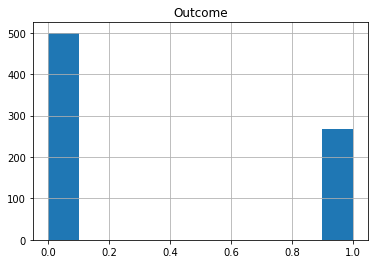

In [262]:
# Diabetics.csv has 2 times non diabetic to 1 time diabetic data
data.hist(column='Outcome'))

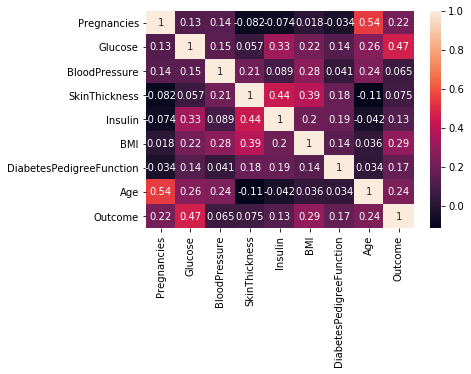

In [263]:
sns.heatmap(data.corr(),annot=True)
# Corelation b/w fields

In [264]:
# features on the 'x' axis
X = data.drop("Outcome",axis = 1)

# label in 'y' axis
y = data.Outcome

In [265]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [266]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [267]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)

In [268]:
def plot_results(train_score, test_score, title, xlabel):
    #standard deviation and mean calculated for testing and trainig scores 
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

   
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Creating the Plot for above
    plt.plot(parameter_range, mean_train_score, label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score, label = "Cross Validation Score", color = 'g')

    # values considered for algo comparison
    best_neighbor = parameter_range[np.argmax(mean_test_score)]

    # Creating the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()

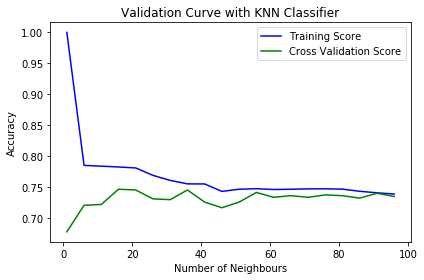

In [269]:
# best n_neighbors for knn algo
parameter_range = np.arange(1, 100, 5)
 
# 10-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy")

plot_results(train_score, test_score, "Validation Curve with KNN Classifier", "Number of Neighbours")


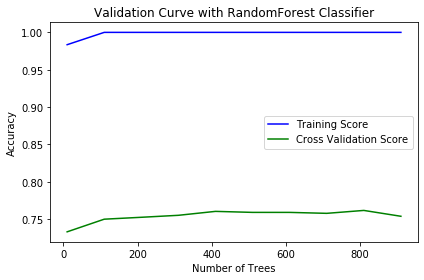

In [270]:
# best n_estimators in random forest 
parameter_range = np.arange(10, 1000, 100)

# 10-fold cross validation
train_score, test_score = validation_curve(RandomForestClassifier(), X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy")
 
plot_results(train_score, test_score, "Validation Curve with RandomForest Classifier", "Number of Trees")
 

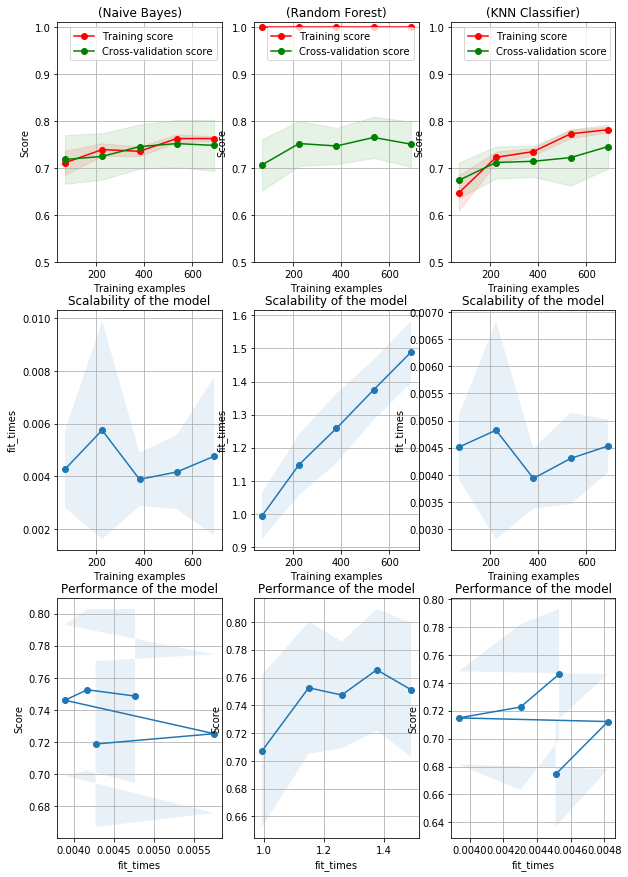

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Learning curve plot
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(10, 15))

# Comparison of Naive Bayes, RF and KNN algo 
clf_gauss = GaussianNB()
plot_learning_curve(clf_gauss, "(Naive Bayes)", X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

clf_rf = RandomForestClassifier(n_estimators = best_estimator)
plot_learning_curve(clf_rf, "(Random Forest)", X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

clf_knn = KNeighborsClassifier(n_neighbors = best_neighbor)
plot_learning_curve(clf_knn, "(KNN Classifier)", X, y, axes=axes[:, 2], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Naive Bayes, RF and KNN have similar performance. Naives Bayes and KNN algorithms scale better for enormous data. 



In [272]:
def cal_tn(Y_test, y_pred): return confusion_matrix(Y_test, y_pred)[0,0]
def cal_fp(Y_test, y_pred): return confusion_matrix(Y_test, y_pred)[0,1]
def cal_fn(Y_test, y_pred): return confusion_matrix(Y_test, y_pred)[1,0]
def cal_tp(Y_test, y_pred): return confusion_matrix(Y_test, y_pred)[1,1]

def tpr(Y_test,y_pred): 
    tp = cal_tp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round((tp / (tp + fn)),2)

def tnr(Y_test,y_pred): 
    tn = cal_tn(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    return round((tn / (tn + fp)),2)

def fpr(Y_test,y_pred): 
    tn = cal_tn(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    
    return round((fp / (tn + fp)),2)

def fnr(Y_test,y_pred): 
    tp = cal_tp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round((fn / (tp + fn)),2)

def Recall(Y_test,y_pred):
    tp = cal_tp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round((tp / (tp + fn)),2)

def Precision(Y_test,y_pred):
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    return round((tp / (tp + fp)),2)

def F1Score(Y_test,y_pred):
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round(((2*tp) / ((2*tp) + fp+fn)),2)

def Accuracy(Y_test,y_pred):
    tn = cal_tn(Y_test,y_pred)
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round(((tp + tn) / (tp + fp + fn + tn)),2)

def Error(Y_test,y_pred):
    tn = cal_tn(Y_test,y_pred)
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round(((fp + fn) / (tp + fp + fn + tn)),2)

def BACC(Y_test,y_pred):
    tn = cal_tn(Y_test,y_pred)
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round(0.5*((tp / (tp + fn))+(tn / (fp + tn))),2)

def TSS(Y_test,y_pred):
    tn = cal_tn(Y_test,y_pred)
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round((tp / (tp + fn))-(fp / (fp + tn)),2)

def HSS(Y_test,y_pred):
    tn = cal_tn(Y_test,y_pred)
    tp = cal_tp(Y_test,y_pred)
    fp = cal_fp(Y_test,y_pred)
    fn = cal_fn(Y_test,y_pred)
    return round((2*((tp * tn)-(fp * fn)))/(((tp + fn)*(fn + tn))+((tp + fp)*(fp + tn))),2)

def cal_mean(dict_score):
    df = pd.DataFrame.from_dict(dict_score, orient='index')
    df['mean'] = df.mean(axis=1)
    return df

In [273]:
from sklearn.metrics import confusion_matrix,make_scorer
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'tpr': make_scorer(tpr),
           'tnr':make_scorer(tnr),'fpr':make_scorer(fpr),'fnr':make_scorer(fnr),'recall':make_scorer(Recall),'precision':make_scorer(Precision),'F1Score':make_scorer(F1Score),
           'Accuracy':make_scorer(Accuracy),'Error':make_scorer(Error),'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),
           'HSS':make_scorer(HSS)}

In [274]:
clf_gauss_score = cross_validate(clf_gauss,X,y,scoring = scoring,cv=cv)
df_gauss = cal_mean(clf_gauss_score)
df_gauss.head(20)


,0,1,2,3,4,5,6,7,8,9,mean
fit_time,0.011970,0.002966,0.002934,0.00289,0.004081,0.005298,0.003251,0.002835,0.002814,0.002864,0.004190
score_time,0.029084,0.022756,0.023649,0.02103,0.024744,0.023822,0.023445,0.020436,0.021349,0.020777,0.023109
test_tp,12.000000,20.000000,15.000000,14.00000,16.000000,14.000000,16.000000,20.000000,17.000000,13.000000,15.700000
test_tn,43.000000,38.000000,40.000000,48.00000,45.000000,40.000000,38.000000,47.000000,39.000000,40.000000,41.800000
test_fp,8.000000,6.000000,9.000000,9.00000,6.000000,10.000000,10.000000,4.000000,9.000000,11.000000,8.200000
test_fn,14.000000,13.000000,13.000000,6.00000,10.000000,13.000000,13.000000,6.000000,11.000000,12.000000,11.100000
test_tpr,0.460000,0.610000,0.540000,0.70000,0.620000,0.520000,0.550000,0.770000,0.610000,0.520000,0.590000
test_tnr,0.840000,0.860000,0.820000,0.84000,0.880000,0.800000,0.790000,0.920000,0.810000,0.780000,0.834000
test_fpr,0.160000,0.140000,0.180000,0.16000,0.120000,0.200000,0.210000,0.080000,0.190000,0.220000,0.166000
test_fnr,0.540000,0.390000,0.460000,0.30000,0.380000,0.480000,0.450000,0.230000,0.390000,0.480000,0.410000


In [275]:
clf_rf_score = cross_validate(clf_rf,X,y,scoring = scoring,cv=cv)
df_rf = cal_mean(clf_rf_score)
df_rf.head(20)


,0,1,2,3,4,5,6,7,8,9,mean
fit_time,1.064124,1.038974,1.030510,1.019342,1.008097,0.996995,1.021667,1.009486,1.015791,0.995461,1.020045
score_time,0.106313,0.109850,0.104925,0.102989,0.109176,0.103296,0.101269,0.104527,0.102074,0.111104,0.105552
test_tp,13.000000,19.000000,15.000000,13.000000,14.000000,16.000000,14.000000,17.000000,18.000000,15.000000,15.400000
test_tn,44.000000,40.000000,44.000000,45.000000,45.000000,43.000000,37.000000,48.000000,39.000000,43.000000,42.800000
test_fp,7.000000,4.000000,5.000000,12.000000,6.000000,7.000000,11.000000,3.000000,9.000000,8.000000,7.200000
test_fn,13.000000,14.000000,13.000000,7.000000,12.000000,11.000000,15.000000,9.000000,10.000000,10.000000,11.400000
test_tpr,0.500000,0.580000,0.540000,0.650000,0.540000,0.590000,0.480000,0.650000,0.640000,0.600000,0.577000
test_tnr,0.860000,0.910000,0.900000,0.790000,0.880000,0.860000,0.770000,0.940000,0.810000,0.840000,0.856000
test_fpr,0.140000,0.090000,0.100000,0.210000,0.120000,0.140000,0.230000,0.060000,0.190000,0.160000,0.144000
test_fnr,0.500000,0.420000,0.460000,0.350000,0.460000,0.410000,0.520000,0.350000,0.360000,0.400000,0.423000


In [276]:
clf_knn_score = cross_validate(clf_knn,X,y,scoring = scoring,cv=cv)
df_knn = cal_mean(clf_knn_score)
df_knn.head(20)

,0,1,2,3,4,5,6,7,8,9,mean
fit_time,0.006313,0.00418,0.002788,0.002858,0.003150,0.002965,0.002766,0.003083,0.003636,0.002920,0.003466
score_time,0.033054,0.03295,0.025597,0.025110,0.023521,0.024060,0.023784,0.025590,0.025843,0.024183,0.026369
test_tp,10.000000,13.00000,14.000000,11.000000,15.000000,11.000000,14.000000,13.000000,18.000000,12.000000,13.100000
test_tn,45.000000,38.00000,42.000000,47.000000,47.000000,46.000000,41.000000,50.000000,43.000000,43.000000,44.200000
test_fp,6.000000,6.00000,7.000000,10.000000,4.000000,4.000000,7.000000,1.000000,5.000000,8.000000,5.800000
test_fn,16.000000,20.00000,14.000000,9.000000,11.000000,16.000000,15.000000,13.000000,10.000000,13.000000,13.700000
test_tpr,0.380000,0.39000,0.500000,0.550000,0.580000,0.410000,0.480000,0.500000,0.640000,0.480000,0.491000
test_tnr,0.880000,0.86000,0.860000,0.820000,0.920000,0.920000,0.850000,0.980000,0.900000,0.840000,0.883000
test_fpr,0.120000,0.14000,0.140000,0.180000,0.080000,0.080000,0.150000,0.020000,0.100000,0.160000,0.117000
test_fnr,0.620000,0.61000,0.500000,0.450000,0.420000,0.590000,0.520000,0.500000,0.360000,0.520000,0.509000


In [277]:

final_result = {'Type of classifier':['KNN', 'RF', 'Gaussian NB'],
        'Test Accuracy Mean':[df_knn.loc["test_Accuracy"]["mean"],df_rf.loc["test_Accuracy"]["mean"],df_gauss.loc["test_Accuracy"]["mean"]]}

df_final_result = pd.DataFrame(final_result)
  
df_final_result.head()

,Type of classifier,Test Accuracy Mean
0,KNN,0.745
1,RF,0.758
2,Gaussian NB,0.748
